<a href="https://colab.research.google.com/github/shourya03roy/Crop-Pattern-Prediction/blob/main/Crop_Pattern_Prediction(Decision_Tree).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Crop_recommendation.csv')
label = data['label'].unique()
data['label'] = data['label'].replace({'rice' : 0, 'maize': 1, 'chickpea' : 2, 'kidneybeans' : 3, 'pigeonpeas' : 4,'mothbeans' : 5, 'mungbean' : 6, 'blackgram' : 7, 'lentil' : 8, 'pomegranate' : 9, 'banana' : 10, 'mango' : 11, 'grapes' : 12, 'watermelon' : 13, 'muskmelon' : 14, 'apple' : 15, 'orange' : 16, 'papaya' : 17, 'coconut' : 18, 'cotton' : 19, 'jute' : 20, 'coffee' : 21})
X = data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']],data['label'], test_size=0.20, random_state=1,shuffle=True)
# X_cv, X_test, y_cv, y_test = train_test_split(X_, y_, test_size=0.50, random_state=1,shuffle=True)
print(label)
X_train,y_train

['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


(        N   P   K  temperature   humidity        ph    rainfall
 1863    1  12  30    27.754298  95.946438  5.562224  131.090008
 987    11  10  45    22.630452  88.455772  6.397996  109.035760
 375     5  74  21    16.244692  21.357939  5.591704   66.970533
 1071  105  88  54    25.787498  84.511942  6.020445  114.200546
 37     95  39  36    23.863305  83.152508  5.561399  285.249365
 ...   ...  ..  ..          ...        ...       ...         ...
 960     1  27  36    23.985988  93.342366  5.684995  104.991282
 905    31  25  38    24.962732  92.405014  6.497367  109.416919
 1096   92  81  52    28.010680  76.528081  5.891414  103.704078
 235    28  58  81    17.475010  16.543148  6.180427   93.350343
 1061   95  74  50    25.901131  80.471527  6.002482  110.103230
 
 [1760 rows x 7 columns],
 1863    18
 987      9
 375      3
 1071    10
 37       0
         ..
 960      9
 905      9
 1096    10
 235      2
 1061    10
 Name: label, Length: 1760, dtype: int64)

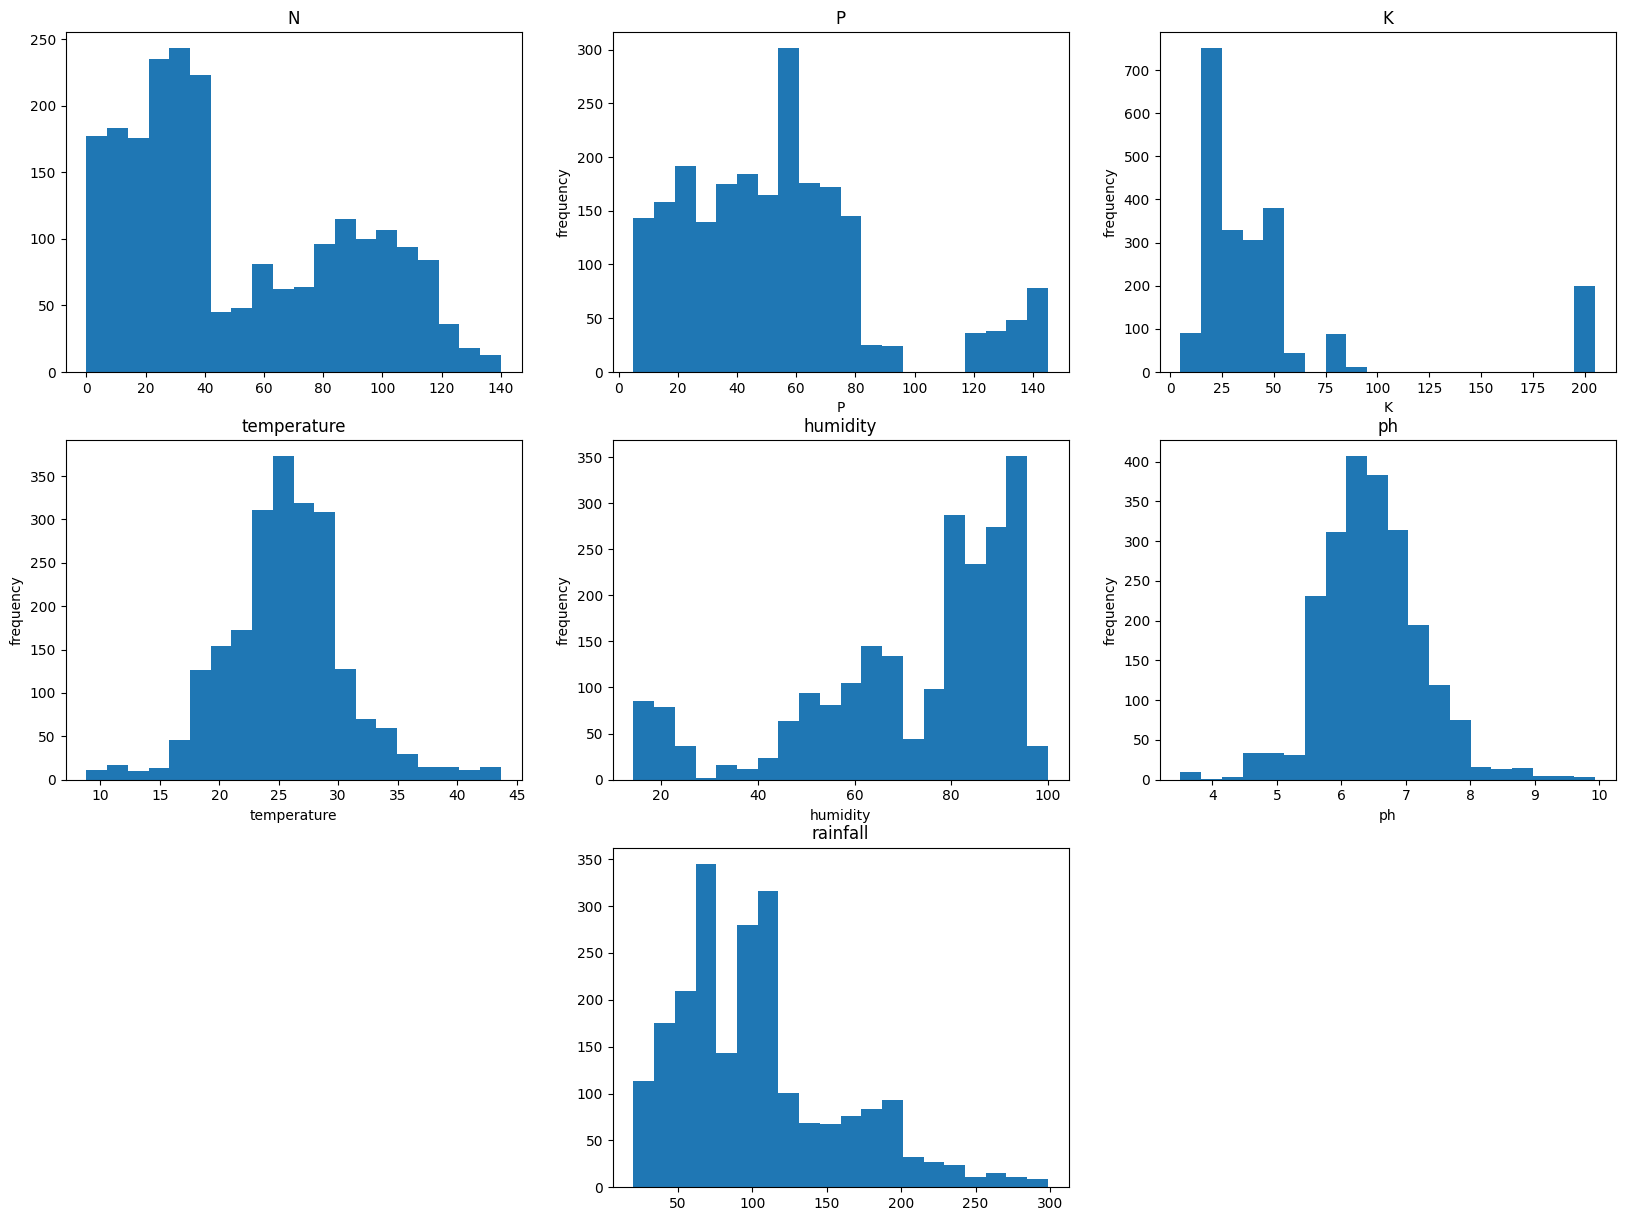

In [ ]:
figure, axis = plt.subplots(3, 3, figsize=(20, 15))
axis[0, 0].hist(X['N'],bins=20)
axis[0, 0].set_title('N')
# axis[0,0].xlabel('N')
# axis[0,0].ylabel('frequency')

axis[0, 1].hist(X['P'],bins=20)
axis[0, 1].set_title('P')
axis[0,1].set_xlabel('P')
axis[0,1].set_ylabel('frequency')

axis[0, 2].hist(X['K'],bins=20)
axis[0, 2].set_title('K')
axis[0,2].set_xlabel('K')
axis[0,2].set_ylabel('frequency')

axis[1, 0].hist(X['temperature'],bins=20)
axis[1, 0].set_title('temperature')
axis[1,0].set_xlabel('temperature')
axis[1,0].set_ylabel('frequency')

axis[1, 1].hist(X['humidity'],bins=20)
axis[1, 1].set_title('humidity')
axis[1,1].set_xlabel('humidity')
axis[1,1].set_ylabel('frequency')

axis[1, 2].hist(X['ph'],bins=20)
axis[1, 2].set_title('ph')
axis[1,2].set_xlabel('ph')
axis[1,2].set_ylabel('frequency')

axis[2, 1].hist(X['rainfall'],bins=20)
axis[2, 1].set_title('rainfall')
axis[2,0].set_xlabel('rainfall')
axis[2,0].set_ylabel('frequency')

figure.delaxes(axis[2,2])
figure.delaxes(axis[2,0])
plt.show()

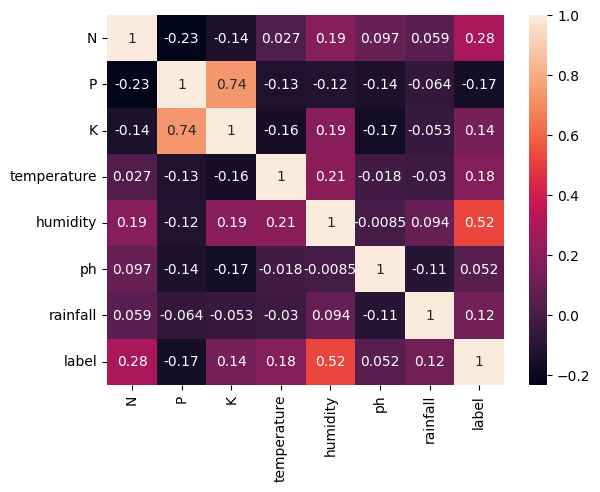

In [ ]:

import seaborn as sns
ax = sns.heatmap(data.corr(), annot=True)

In [ ]:
decision_tree_model = DecisionTreeClassifier(min_samples_split = 50,max_depth = 8, random_state = 55).fit(X_train,y_train)

In [ ]:
y_pred = decision_tree_model.predict(X_train)
accuracy_score(y_pred,y_train)*100

99.43181818181817

In [ ]:
y_tpred = decision_tree_model.predict(X_test)
accuracy_score(y_tpred,y_test)*100

99.31818181818181

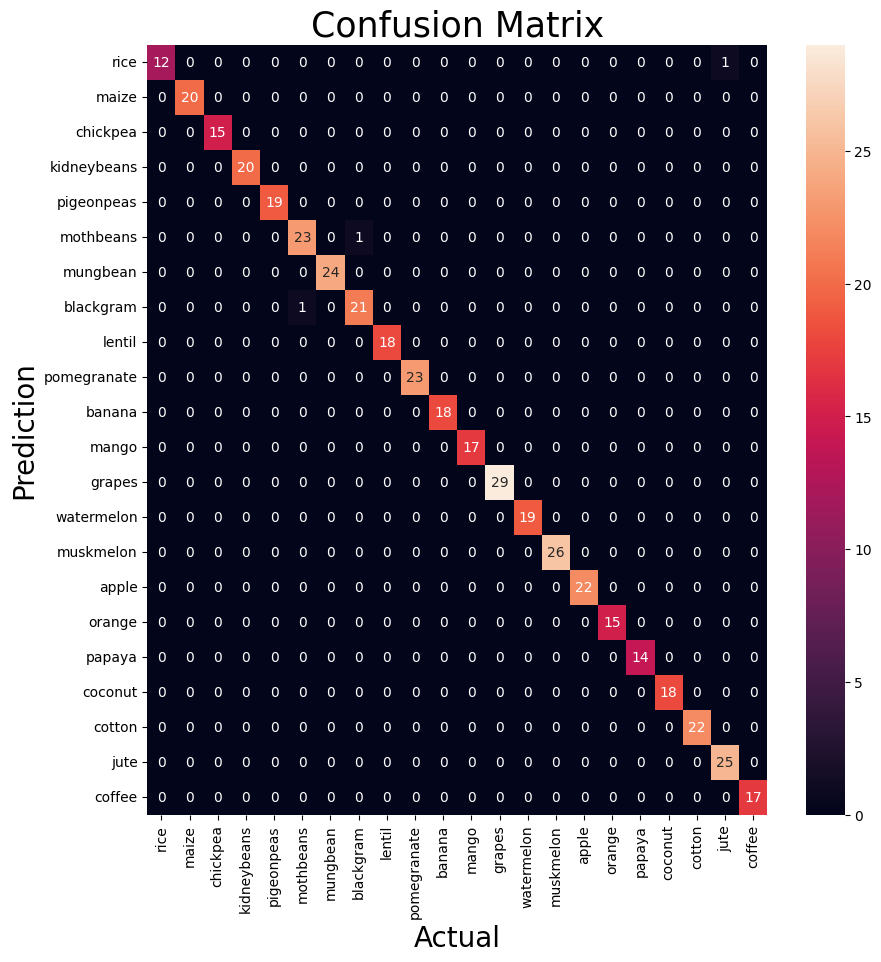

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test,y_tpred)
plt.figure(figsize = (10,10))
sns.heatmap(cm,annot=True,fmt='g',xticklabels=label,yticklabels=label)
plt.ylabel('Prediction',fontsize=20)
plt.xlabel('Actual',fontsize=20)
plt.title('Confusion Matrix',fontsize=25)
plt.show()

In [ ]:
import sklearn.tree as tree
fig = plt.figure(figsize=(200,200))
_ = tree.plot_tree(decision_tree_model,
                   feature_names=['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'],
                   class_names=label,
                   filled=True)

In [ ]:
fig.savefig("decistion_tree.png")

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision = precision_score(y_test, y_tpred,average="weighted")
recall = recall_score(y_test, y_tpred,average="weighted")
print("Precision: ", precision*100)
print("Recall: ", recall*100)

Precision:  99.32692307692308
Recall:  99.31818181818181
